In [1]:
import torch
import os
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torch import nn

In [90]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [91]:
dataset=load_iris()


In [92]:
import pandas as pd
df=pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [108]:
X=df.copy()
y=dataset['target']

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)


In [2]:
if torch.cuda.is_available():
    print('Yes')
else:
    print('No cuda')

No cuda


In [28]:
class layers:
    def __init__(self):
        self.input=None
        self.output=None
    def fp(self,input):
        return ('okay')
        raise NotImplementedError
    def bp(self,output):
        raise NotImplementedError
        

In [9]:
layers

__main__.layers

In [19]:
layers.fp(1,1)

'okay'

In [27]:
type(torch.zeros(2).float())

torch.Tensor

In [26]:
type(torch.zeros(2))

torch.Tensor

In [29]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork,self).__init__()

In [31]:
NeuralNetwork()

NeuralNetwork()

In [40]:
import numpy as np
k=np.array([[[2,3],[3,5]]])
t=torch.tensor(k)

In [41]:
k.shape

(1, 2, 2)

In [42]:
np.random.rand(k.shape[1],4) 

array([[0.77427484, 0.14145711, 0.14029485, 0.78598996],
       [0.96905958, 0.63391357, 0.83279313, 0.93504674]])

In [45]:
np.random.rand(4,1)   

array([[0.50087788],
       [0.95871654],
       [0.28089471],
       [0.10227803]])

In [53]:
#NN from scratcg

class NeuralNetwork:
    def __init__(self,x,y):
        self.input=x
        self.y=y
        self.output=np.zeros(y.shape)
        self.weights1=np.random.rand(self.input.shape[1],4)
        self.weights2=np.random.rand(4,1)
        

In [116]:
def sigmoid(x):
    return (np.exp(x)/(1-np.exp(1)))

def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

In [128]:
sigmoid_derivative(100)

-2.4474148232535976e+86

In [147]:
def feedforward_function(x,w1,w2,predict=False):
    a1=np.matmul(x,w1)
    z1=sigmoid(a1)
    #bias
    bias=np.ones(len(z1),1)
    z1=np.concatenate((bias,z1),axis=1)
    a2=np.matmul(z1,w2)
    z2=sigmoid(a2)
    if predict:
        return z2
    return a1,z1,a2,z2

In [146]:
def backpropagation(a2,z0,z1,z2,y):
    delta2=z2-y
    Delta2=np.matmul(z1.T,delta2)
    delta1=(delta2.dot(w2[1:,:].T))*sigmoid(a1)
    Delta1=np.matmul(z0.T,delta1)
    return delta2,Delta1,Delta2

In [149]:
X=np.array([[1,1,0],
           [1,0,1],
           [1,0,0],
           [1,1,1]])
y=np.array([[1],[1],[0],[0]])


In [152]:
w1=np.random.rand(3,5)
w2=np.random.rand(6,1)

lr=0.09
costs=[]
epochs=17000

In [156]:
for i in range(epochs):
    a1, z1, a2, z2 = feedforward_function(X, w1, w2)
    delta2, Delta1, Delta2 = backpropagation(a2, X, z1, z2, y)
    
    w1-=lr*(1/m)*Delta1
    w2-=lr*(1/m)*Delta2
    
    c=np.mean(np.abs(delta2))
    costs.append(c)
    
    if i % 1000 == 0:
        print('Iteration: ',i, 'Error: ',c)
 
# Training complete
print("Training completed.")

TypeError: Cannot interpret '1' as a data type

In [158]:
def forward(x, w1, w2, predict=False):
    a1 = np.matmul(x, w1)
    z1 = sigmoid(a1)

    # create and add the bias
    bias = np.ones((len(z1), 1))
    z1 = np.concatenate((bias, z1), axis = 1)
    a2 = np.matmul(z1, w2)
    z2 = sigmoid(a2)
    if predict:
        return z2
    return a1, z1, a2, z2

In [163]:
def backprop(a2, z0, z1, z2, y): 
    delta2 = z2 - y
    Delta2 = np.matmul(z1.T, delta2)
    delta1 = (delta2.dot(w2[1:,:].T))*sigmoid_derivative(a1)
    Delta1 = np.matmul(z0.T, delta1)
    return delta2, Delta1, Delta2

In [172]:
X = np.array([[1, 1, 0],
 [1, 0, 1],
 [1, 0, 0],
 [1, 1, 1]])
y = np.array([[1], [1], [0], [0]])

w1 = np.random.randn(3,5)
w2 = np.random.randn(6,1)


lr = 0.09
costs = []
# init epochs
epochs = 17000
m=1000

In [173]:
# Start training
for i in range(epochs):
    a1, z1, a2, z2 = forward(X, w1, w2)
    delta2, Delta1, Delta2 = backprop(a2, X, z1, z2, y)
    w1 -= lr*(1/m)*Delta1
    w2 -= lr*(1/m)*Delta2
    c = np.mean(np.abs(delta2))
    costs.append(c)
    if i % 1000 == 0:
        print('Iteration: ',i, 'Error: ',c)

        
print('Training completed.')




Iteration:  0 Error:  14.519987288878342


C:\Users\pnl0gp8t\AppData\Local\Temp\ipykernel_24672\4241114873.py:2: RuntimeWarning: overflow encountered in exp
  return (np.exp(x)/(1-np.exp(1)))
C:\Users\pnl0gp8t\AppData\Local\Temp\ipykernel_24672\2239608374.py:3: RuntimeWarning: invalid value encountered in matmul
  Delta2 = np.matmul(z1.T, delta2)
C:\Users\pnl0gp8t\AppData\Local\Temp\ipykernel_24672\2239608374.py:4: RuntimeWarning: invalid value encountered in multiply
  delta1 = (delta2.dot(w2[1:,:].T))*sigmoid_derivative(a1)
C:\Users\pnl0gp8t\AppData\Local\Temp\ipykernel_24672\2239608374.py:5: RuntimeWarning: invalid value encountered in matmul
  Delta1 = np.matmul(z0.T, delta1)


Iteration:  1000 Error:  nan
Iteration:  2000 Error:  nan
Iteration:  3000 Error:  nan
Iteration:  4000 Error:  nan
Iteration:  5000 Error:  nan
Iteration:  6000 Error:  nan
Iteration:  7000 Error:  nan
Iteration:  8000 Error:  nan
Iteration:  9000 Error:  nan
Iteration:  10000 Error:  nan
Iteration:  11000 Error:  nan
Iteration:  12000 Error:  nan
Iteration:  13000 Error:  nan
Iteration:  14000 Error:  nan
Iteration:  15000 Error:  nan
Iteration:  16000 Error:  nan
Training completed.


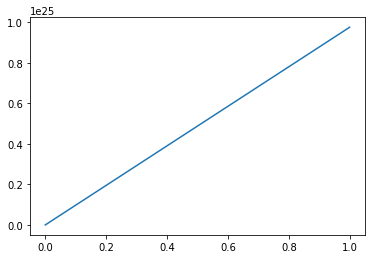

In [174]:
plt.plot(costs)
plt.show()

In [176]:
z3 = forward(X,w1,w2,True)
print('Percentages: ')
print(z3)
print('Predictions: ')
print(np.round(z3))

Percentages: 
[[nan]
 [nan]
 [nan]
 [nan]]
Predictions: 
[[nan]
 [nan]
 [nan]
 [nan]]


In [177]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2

In [179]:
NeuralNetwork

__main__.NeuralNetwork

In [183]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [196]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [215]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [217]:
X=torch.rand(1,28,28,device=device)
logits=model(X)

pred_prob=nn.Softmax(dim=1)(logits)
y_pred=pred_prob.argmax(1)
y_pred



tensor([6])

In [218]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [225]:
flat=nn.Flatten()
flat_image=flat(input_image)
flat_image.size()

torch.Size([3, 784])

In [231]:
layer1=nn.Linear(in_features=28*28, out_features=20)
hidden1=layer1(flat_image)
hidden1.size()

torch.Size([3, 20])

In [233]:
print(hidden1)
hidden1=nn.ReLU()(hidden1)
hidden1

tensor([[-4.3861e-02, -2.8733e-01, -4.3802e-01, -2.1829e-01,  2.2383e-02,
         -1.6549e-01,  1.8871e-01,  1.0898e-01, -5.6244e-01,  1.1988e-01,
          3.8169e-01, -1.3100e-01, -1.6731e-01, -4.9978e-05,  1.0389e+00,
         -1.3575e-01, -6.8931e-01,  2.8586e-01,  1.1274e-02,  1.3131e-01],
        [-3.4414e-01, -1.8756e-01, -5.7897e-01,  6.3074e-03, -2.0038e-01,
         -8.4026e-02,  4.8351e-01,  1.7402e-02, -7.1018e-01,  3.5139e-01,
         -7.4317e-02, -1.1168e-01, -5.4186e-02, -2.6973e-01,  7.1553e-01,
         -1.6491e-01, -3.5184e-01,  2.1305e-01,  2.9582e-01,  9.0899e-02],
        [ 1.3411e-01, -2.4767e-01, -6.2953e-01, -1.1250e-01, -1.9173e-01,
         -3.3918e-01,  4.2047e-01, -8.3970e-02, -1.1886e-01,  7.3527e-02,
          5.2994e-02, -1.0833e-01, -1.8157e-01, -1.2979e-01,  1.0395e+00,
         -8.0021e-02, -5.1060e-01,  3.0998e-01, -7.8447e-02,  6.2034e-02]],
       grad_fn=<AddmmBackward0>)


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0224, 0.0000, 0.1887, 0.1090, 0.0000,
         0.1199, 0.3817, 0.0000, 0.0000, 0.0000, 1.0389, 0.0000, 0.0000, 0.2859,
         0.0113, 0.1313],
        [0.0000, 0.0000, 0.0000, 0.0063, 0.0000, 0.0000, 0.4835, 0.0174, 0.0000,
         0.3514, 0.0000, 0.0000, 0.0000, 0.0000, 0.7155, 0.0000, 0.0000, 0.2131,
         0.2958, 0.0909],
        [0.1341, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4205, 0.0000, 0.0000,
         0.0735, 0.0530, 0.0000, 0.0000, 0.0000, 1.0395, 0.0000, 0.0000, 0.3100,
         0.0000, 0.0620]], grad_fn=<ReluBackward0>)

In [235]:
seq_modules = nn.Sequential(
    flat,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [236]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [237]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0143,  0.0345,  0.0011,  ..., -0.0331, -0.0171,  0.0238],
        [ 0.0356, -0.0186, -0.0089,  ...,  0.0035, -0.0225,  0.0221]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0035, 0.0074], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0355, -0.0190,  0.0115,  ..., -0.0258, -0.0048, -0.0376],
        [-0.0102,  0.0224,  0.0021,  ..., -0.0058, -0.0390,  0.0232]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Si